# YOUTUBE APIs
This simple proect is meant to access my youtube channel and create a dataframe of all the videos in my channel. Also it will show the likes, comments and the number of views per video

In [2]:
# import the reuired keys
import requests
import pandas as pd

In [4]:
# This module contains a .py file that has my keys and channle id. You can replace yours with the exact values.
import keys
api_key = keys.api_key
channel_id = keys.channel_id

In [5]:
# make an API call

pageToken = ''
url = 'https://www.googleapis.com/youtube/v3/search?key='+api_key+'&channelId='+channel_id+'&part=snippet,id&order=date&maxResults=1000'+pageToken
response = requests.get(url).json()

In [6]:
# preview our response
response

{'kind': 'youtube#searchListResponse',
 'etag': '6sYEWRkGeWljheqJ6MiINHWxLIQ',
 'nextPageToken': 'CDIQAA',
 'regionCode': 'KE',
 'pageInfo': {'totalResults': 114, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'Z3_kfo9k_-L7JZuBmTxMksf77FY',
   'id': {'kind': 'youtube#video', 'videoId': 'xEM1G0xiJeM'},
   'snippet': {'publishedAt': '2023-03-14T16:30:08Z',
    'channelId': 'UCMZE73Jb60W_EBq8RSmScEA',
    'title': 'Paulo Siria - Yesu iyie Atusujwa',
    'description': 'Have you subscribed this channel? If not yet kindly do...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/xEM1G0xiJeM/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/xEM1G0xiJeM/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/xEM1G0xiJeM/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle': 'Ole Nkapu Ent’',
    'liveBroadcastContent': 'none',
  

In [7]:
def get_videos(api_key, response):
    ''' This function takes two arguments, the api_key and the response and generates a list of videos from that channel'''
    list_of_videos = [] # an empty list that will hold all the video details
    for video in response['items']:
        if video['id']['kind'] == 'youtube#video': # only choose videos 
            results = {
                    'Video ID' : video['id']['videoId'],
                    'Video Title' : str(video['snippet']['title']).replace("&amp;", ''),
                    'Publish Date' : str(video['snippet']['publishedAt']).split("T")[0]
                    }
            video_id = video['id']['videoId'] 
            url_stats = 'https://www.googleapis.com/youtube/v3/videos?id='+video_id+'&part=statistics&key='+api_key # second response for video stats
            response_video_stats = requests.get(url_stats).json()
            for stats in response_video_stats['items']:
                results['View Count'] = stats['statistics']['viewCount']
                results['Like Count'] = stats['statistics']['likeCount']
                results['Comment Count'] = stats['statistics']['commentCount']
            
                list_of_videos.append(results) # append to our list above
    return list_of_videos

In [9]:
# Create a pandas Data Frame from a list of all the videos
my_videos = get_videos(api_key, response)
df = pd.DataFrame(my_videos)
df

,Video ID,Video Title,Publish Date,View Count,Like Count,Comment Count
0,xEM1G0xiJeM,Paulo Siria - Yesu iyie Atusujwa,2023-03-14,2550,64,4
1,07Yo7aG7ugY,Samburu Best Gospel Artist | Zakayo Leuria | A...,2023-03-11,2582,72,10
2,o6IdMQnUs6s,Ole Kamoye | Matang`ar Encholiek,2023-03-09,4046,64,6
3,9tedEbeODlo,Best Maa Song; Eli Karbolo,2023-03-05,879,44,1
4,ruBKOHNzMFc,Timothy Opoti - Aidimani Live Performance,2023-03-04,23233,346,44
5,NDDfd4Mhhko,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94233,800,96
6,3yn1C2lTcUo,David Tikoi Performs Live at Elangata Enkima,2023-02-21,1475,27,0
7,UQI3ElMhiXQ,Benson Meitaya | Maureishoyu Aikata,2023-02-01,1642,49,1
8,M0MdrFbkKVI,Leshao Leshao O Naloakiti enye,2023-01-16,18997,335,23
9,zRw-gNwG5Wk,Nchereeni | Thanksgiving,2023-01-14,8910,55,5


In [10]:
# To be able to use the View Count column Convert it from string to int
df['View Count'] = df['View Count'].astype(int)
df.sort_values(by='View Count', ascending=False)

,Video ID,Video Title,Publish Date,View Count,Like Count,Comment Count
11,pnAxphXJrdg,Kamurar Maasai Performs Live | Jamhuri Celebra...,2022-12-13,214579,827,47
15,e2ZawG4cTfw,"Ole Tipis Girls Sings, Aitorisho Ainyorisho Yesu",2022-11-19,124735,626,56
37,TNKDXh_5hzs,Rev. Ole Naiswaku ~ Mataasishore Enkata Part 1,2021-12-21,117031,533,23
39,njrixWAexwE,Rev Ole Naiswaku live at Katakala,2021-12-07,107108,556,26
49,JfP2L7HJ9jY,Ole Naiswaku ~ Part 3 ~ Tipat Enashe,2021-10-05,106887,432,24
14,NNJf5BUs5xI,Ole Tipis High School Prayer Day,2022-11-23,100453,524,24
47,fAXSCj9oD4Y,Ole Naiswaku Part 4 ~ AGC Mbokishi,2021-10-24,98164,376,20
5,NDDfd4Mhhko,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94233,800,96
24,OXplyPdoL8s,Bsp Zablon Laizer Katika uzinduzi wa Selina Da...,2022-08-07,93309,427,43
35,-6FmwVzfOJo,Rev Ole Naiswaku | Enkata Part 2,2021-12-28,68745,321,14


In [14]:
import openpyxl
ole_nkapu_channel = df.to_excel("olenkapu_channel_info.xlsx")

### The Top most watched videos plot

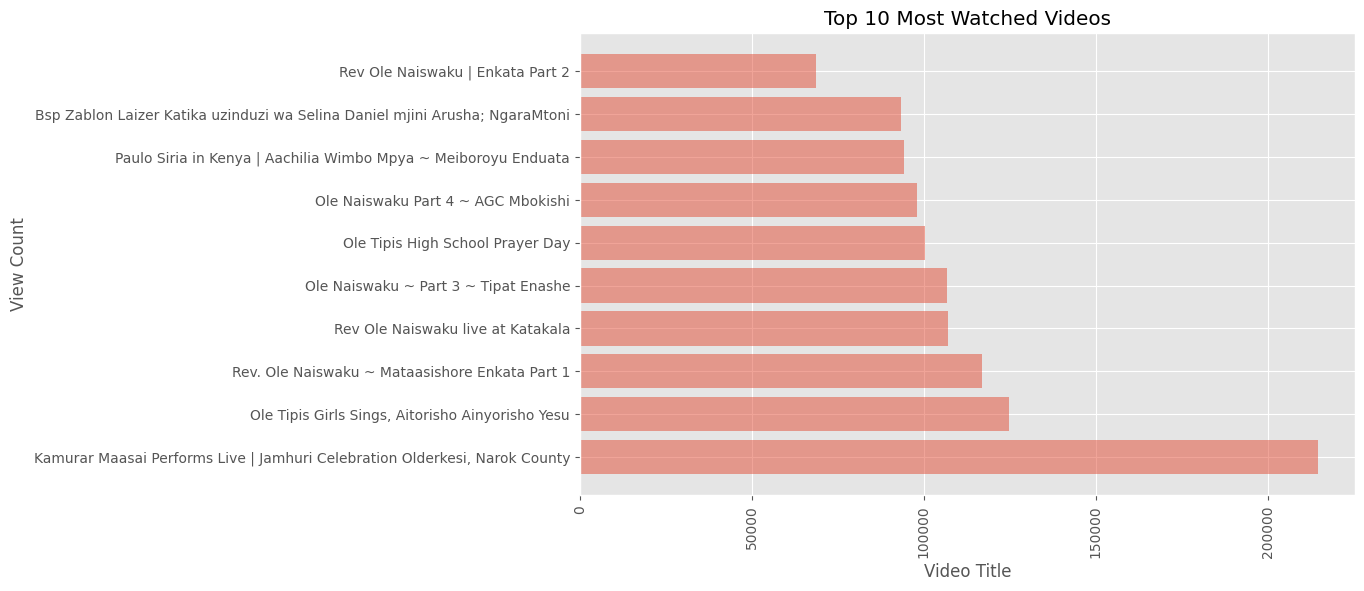

In [30]:
import matplotlib.pyplot as plt
# sort the dataframe by view count
df_sorted = df.sort_values(by='View Count', ascending=False).head(10)

# create a bar plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_sorted['Video Title'], df_sorted['View Count'], alpha=0.5)

# set x-axis label rotation
plt.xticks(rotation=90)

# set plot title and axis labels
plt.title('Top 10 Most Watched Videos')
plt.xlabel('Video Title')
plt.ylabel('View Count')

# display the plot
plt.show()

In [28]:
### Conclusion
#Below and the Top 10 watched videos, date published, and their view count
df.iloc[:, [1,2,3]].sort_values(by='View Count', ascending=False).head(10)

,Video Title,Publish Date,View Count
11,Kamurar Maasai Performs Live | Jamhuri Celebra...,2022-12-13,214579
15,"Ole Tipis Girls Sings, Aitorisho Ainyorisho Yesu",2022-11-19,124735
37,Rev. Ole Naiswaku ~ Mataasishore Enkata Part 1,2021-12-21,117031
39,Rev Ole Naiswaku live at Katakala,2021-12-07,107108
49,Ole Naiswaku ~ Part 3 ~ Tipat Enashe,2021-10-05,106887
14,Ole Tipis High School Prayer Day,2022-11-23,100453
47,Ole Naiswaku Part 4 ~ AGC Mbokishi,2021-10-24,98164
5,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94233
24,Bsp Zablon Laizer Katika uzinduzi wa Selina Da...,2022-08-07,93309
35,Rev Ole Naiswaku | Enkata Part 2,2021-12-28,68745
